<a href="https://colab.research.google.com/github/sanjogmish/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Health Insurance Cross Sell Prediction: EDA And Data Prep**

In [ ]:
#@title Importing the modules

from google.colab import drive
drive._mount('/content/drive')
!pip install category_encoders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["font.size"] = "12"

Mounted at /content/drive
     |████████████████████████████████| 82 kB 395 kB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## **Reading The Data**

In [ ]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone 2 Classification/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

## **Doing Some Basic Analysis**

In [ ]:
# Checking shape of the data
df.shape

(381109, 12)

In [ ]:
# Doing a head to check the data
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
# Checking the datatypes of all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
# Checking for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
# Checking for duplicate rows in the data
df.duplicated().value_counts()

False    381109
dtype: int64

> **No nulls, no duplicates.**

## **Dividing the columns on basis of the kind of data they have.**

In [ ]:
# Clubbing all the features into different lists according to their type
numerical_cols = ['Age','Annual_Premium','Vintage']
categorical_cols = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']
label_cols = ['Region_Code','Policy_Sales_Channel']
target = ['Response']

In [ ]:
# Doing a statistical analysis on numeric columns
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0


In [ ]:
# Checking for object type columns
df.describe(include='object').T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


## **Dropping id column as it is reduntant**

In [ ]:
# Removing column id, as it is of no use
df.drop('id',axis=1,inplace=True)

In [ ]:
# Typecasting to int
df[label_cols] = df[label_cols].astype('int64')

In [ ]:
# Getting skewness of all the columns
df.skew(axis=0).to_frame('Skewed Values')

,Skewed Values
Age,0.672539
Driving_License,-21.595182
Region_Code,-0.115266
Previously_Insured,0.167747
Annual_Premium,1.766087
Policy_Sales_Channel,-0.900008
Vintage,0.003030
Response,2.301906


> **All features here look skewed. Although, it looks way too skewed in D.L but that is a categorical variable. Apart from that, in continuos variables only annual premium requires some transformations.**

# **Univariate analysis**

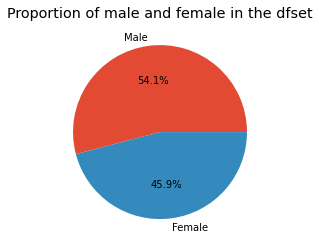

In [ ]:
# Plotting pie chart for categorical columns
df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel("")
plt.title("Proportion of male and female in the dfset");

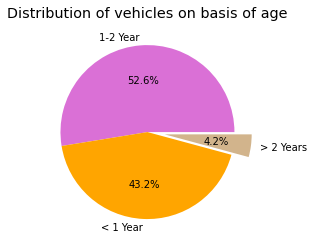

In [ ]:
# Distribution of vehicles on basis of age
df['Vehicle_Age'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0,0,0.2],colors=['orchid','orange','tan'])
plt.ylabel("")
plt.title("Distribution of vehicles on basis of age");

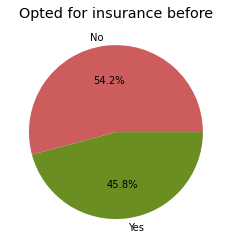

In [ ]:
# Who opted for insurance before
df['Previously_Insured'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['No','Yes'],colors=['indianred','olivedrab'])
plt.ylabel("")
plt.title("Opted for insurance before");

## **Checking for outliers in numerical columns**

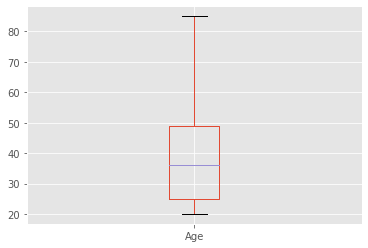

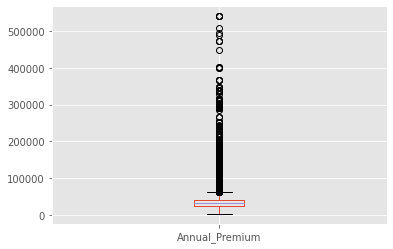

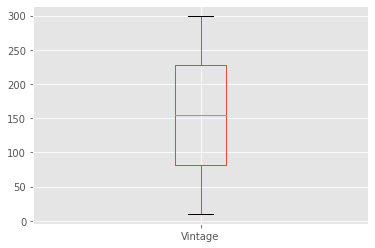

In [ ]:
# Plotting boxplots for checking outliers
for i in df[numerical_cols]:
    plt.figure()
    df.boxplot([i],grid=True,figsize=(6,6))

> **Annual premium has outliers because the premium amount depends on various factors. New and expensive cars generally have high amounts.**

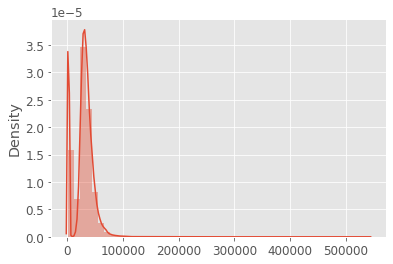

In [ ]:
# Plotting distribution for Annual premium
sns.distplot(x=df['Annual_Premium']);

> **Right Skewed distribution.**

> **We can apply log transformation to see better.**

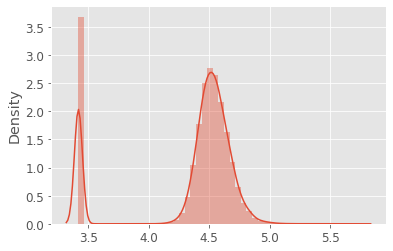

In [ ]:
# After applying log transformation
sns.distplot(x=np.log10(df['Annual_Premium']));

> **The distribution looks better now.**

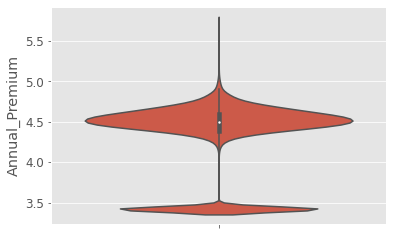

In [ ]:
# Plotting violinplot for premium
sns.violinplot(y=np.log10(df['Annual_Premium']));

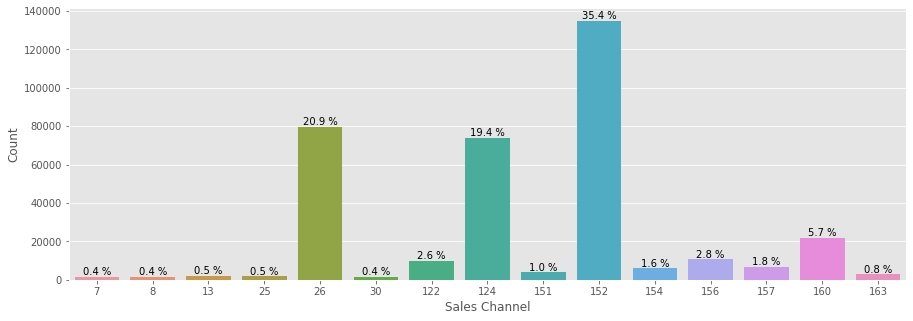

In [ ]:
# Plotting policy sales channel according to percentages
labels= df['Policy_Sales_Channel'].value_counts().iloc[:15].keys()
values= df['Policy_Sales_Channel'].value_counts().iloc[:15]

plt.figure(figsize = (15, 5))
graph = sns.barplot(x = labels, y = values)
plt.xlabel("Sales Channel")
plt.ylabel("Count")

for p in graph.patches:
        graph.annotate('{:1.1f} %'.format(p.get_height()/len(df)*100), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

> **Customer outreach is higher for Sales channel 152, 26, 124, 160.**

In [ ]:
pd.crosstab(index=df['Policy_Sales_Channel'],columns=df['Response']).sort_values(by=1,ascending=False).iloc[:15]

Response,0,1
Policy_Sales_Channel,,
26,63809,15891
124,59999,13996
152,130926,3858
156,8364,2297
157,4890,1794
122,8210,1720
154,4519,1474
163,2013,880
160,21304,475


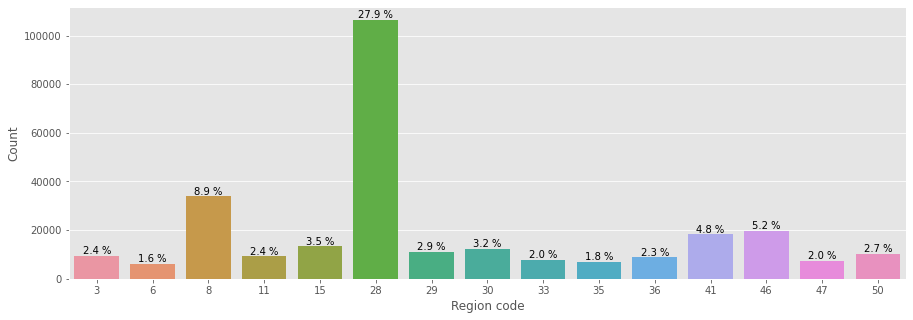

In [ ]:
# Plotting region code vs value counts
labels= df['Region_Code'].value_counts().iloc[:15].keys()
values= df['Region_Code'].value_counts().iloc[:15]

plt.figure(figsize = (15, 5))
graph = sns.barplot(x = labels, y = values)
plt.xlabel("Region code")
plt.ylabel("Count")
for p in graph.patches:
        graph.annotate('{:1.1f} %'.format(p.get_height()/len(df)*100), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

>> **Most number of customers are in the Region code 28, 8, 46, 41.**

In [ ]:
pd.crosstab(index=df['Region_Code'],columns=df['Response']).sort_values(by=1,ascending=False).iloc[:15]

Response,0,1
Region_Code,,
28,86498,19917
8,30620,3257
41,16039,2224
46,17717,2032
29,9700,1365
3,8070,1181
11,8191,1041
15,12350,958
30,11291,900


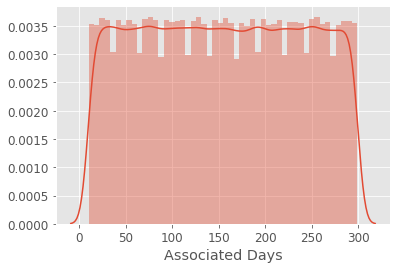

In [ ]:
# Plotting distribution for vintage
sns.distplot(df['Vintage'])
plt.ylabel("")
plt.xlabel("Associated Days");

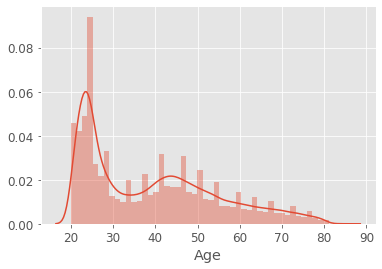

In [ ]:
# Distribution plot for age
sns.distplot(df['Age'])
plt.ylabel("");

## **Target variable**

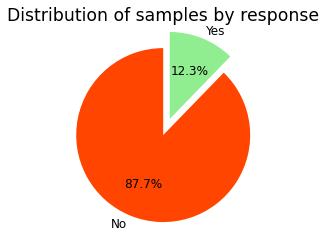

In [ ]:
# Distribution of samples by response

df['Response'].value_counts().plot(kind='pie',colors=['orangered','lightgreen'],explode=[0,0.2],autopct='%1.1f%%',startangle=90,labels=['No','Yes'])
plt.ylabel("")
plt.title("Distribution of samples by response");

> **The data is highly imbalanced.**

# **Bivariate analysis**

### **Function for plotting the distribution of categorical variables with target**

In [ ]:
#@title **Function definition**
def plot_cat(col_name):
    tmp_df = pd.crosstab(df[col_name],df['Response'])
    new_df = pd.DataFrame()
    tmp_df['sum'] = tmp_df.sum(axis=1)
    new_df[0] = tmp_df[0]/tmp_df['sum'] * 100
    new_df[1] = tmp_df[1]/tmp_df['sum'] * 100
    ax = new_df.plot(kind='bar');
    ax.set_ylim((0, 110))
    plt.ylabel('Percentage')
    plt.title(f'% Response by {col_name}')
    for i,p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.1f} %'.format(height), ha="center")
    plt.show()

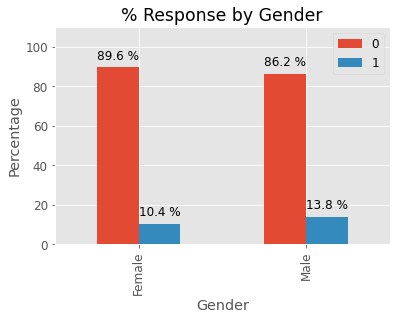

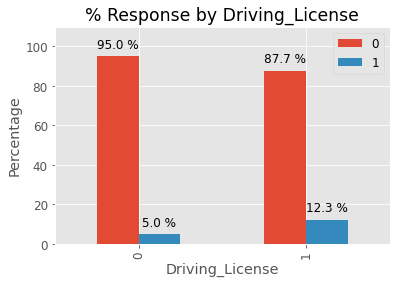

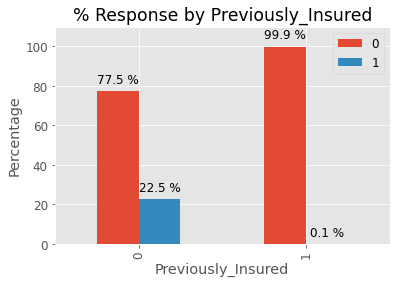

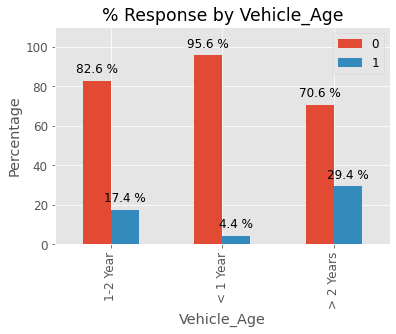

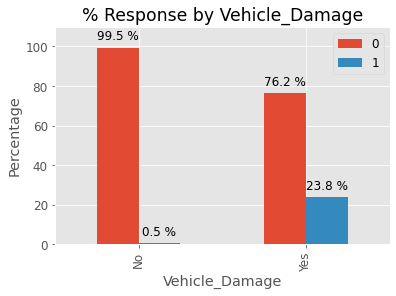

In [ ]:
# Plotting bars for categorical features
for i in categorical_cols:
    plot_cat(i)

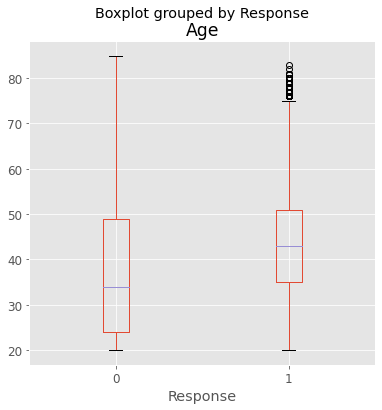

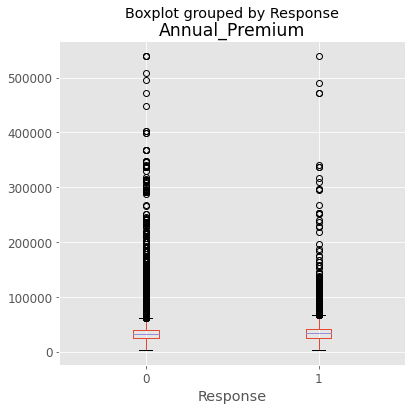

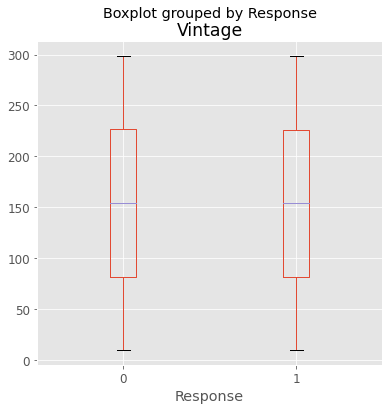

In [ ]:
# Plotting boxplots by response
for i in numerical_cols:
    df.boxplot(column=i,by='Response',figsize=(6,6))

> **Annual premium has outliers.**

> **Age also has outliers for when the response is positive. It can be possible as there can be old-retired people who are rich and have bought a car and want it insured.**

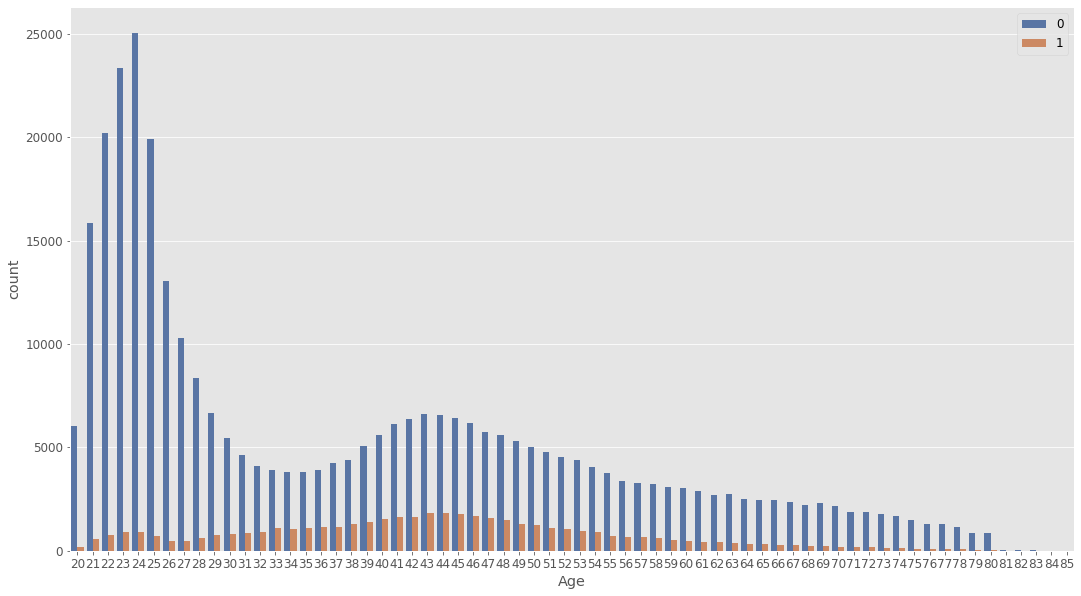

In [ ]:
# Distribution of Age Vs response
plt.subplots(figsize=(18,10))
sns.countplot('Age',hue='Response',data=df,palette='deep')
plt.legend(loc='upper right',fontsize=12);

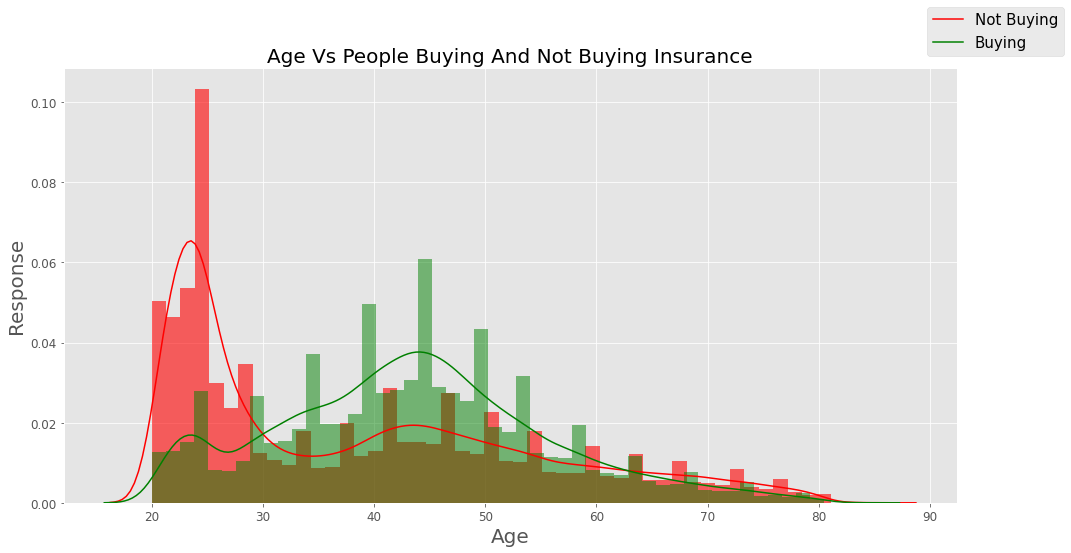

In [ ]:
# Plotting Age Vs People Buying And Not Buying Insurance
fig=plt.figure(figsize=(16,8))
sns.distplot(df[df['Response']==0]['Age'],color='red',hist_kws={'alpha':0.6})
sns.distplot(df[df['Response']==1]['Age'],color='green',hist_kws={'alpha':0.5})
fig.legend(labels=['Not Buying','Buying'],fontsize=15)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Response',fontsize=20)
plt.title('Age Vs People Buying And Not Buying Insurance',fontsize=20);

Age group 20 - 30 : Percentage of people with response as "Yes" according to age gorups:  4.28 %
Age group 30 - 40 : Percentage of people with response as "Yes" according to age gorups:  25.02 %
Age group 40 - 50 : Percentage of people with response as "Yes" according to age gorups:  26.96 %
Age group 50 - 60 : Percentage of people with response as "Yes" according to age gorups:  21.49 %
Age group 60 - 70 : Percentage of people with response as "Yes" according to age gorups:  12.94 %
Age group 70 - 80 : Percentage of people with response as "Yes" according to age gorups:  8.25 %
Age group 80 - 90 : Percentage of people with response as "Yes" according to age gorups:  6.68 %
Age group 90 - 100 : 

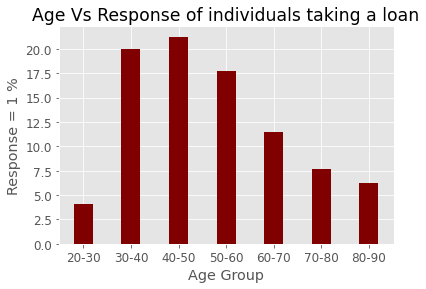

In [ ]:
# Percentage of people with response as "Yes" according to age gorups:
percentage_of_acceptance_according_to_age = []
age_group = []
for age in [20, 30,40,50,60,70,80,90]:
    
    try:
        print("Age group", age,'-', age+10, ':', end= ' ')
        age_group.append(str(age) + '-' + str(age+10))
        print('Percentage of people with response as "Yes" according to age gorups: ', round(len(df[(df['Age']>=age) & (df['Age']<age+10)& (df['Response'] == 1)])/ len(df[(df['Age']>=age) & (df['Age']<age+10)& (df['Response'] == 0)])*100,2),'%')
        percentage_of_acceptance_according_to_age.append(len(df[(df['Age']>=age) & (df['Age']<age+10)& (df['Response'] == 1)])/ (len(df[(df['Age']>=age) & (df['Age']<age+10)& (df['Response'] == 1)]) + len(df[(df['Age']>=age) & (df['Age']<age+10)& (df['Response'] == 0)]))*100)
        
    except:
        continue
    
plt.bar(age_group[:-1], percentage_of_acceptance_according_to_age, color ='maroon',
        width = 0.4)
 
plt.xlabel("Age Group")
plt.ylabel("Response = 1 %")
plt.title("Age Vs Response of individuals taking a loan")
plt.show()

In [ ]:
# Binning according to ages
bin=np.linspace(min(df['Age']),max(df['Age']),5)
groups=['Young_Age','Medium_Age','Old_Age','Senior_Citizen']
df['Age-binned']=pd.cut(df['Age'],bins=bin,labels=groups)

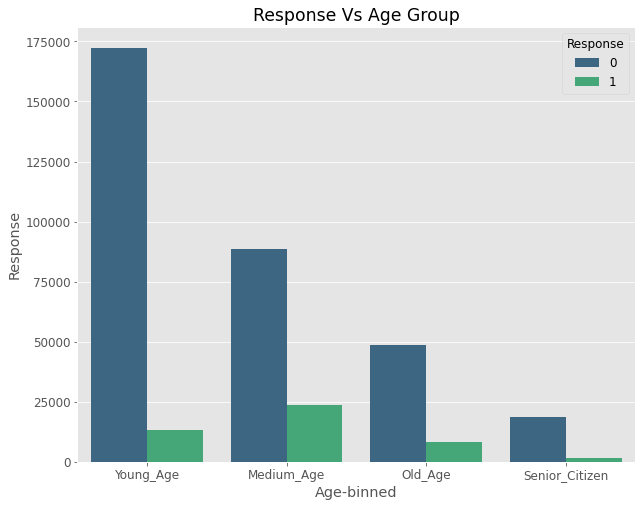

In [ ]:
# Plotting response Vs age
plt.figure(figsize=(10,8))
sns.countplot(df['Age-binned'],hue=df['Response'],palette='viridis')
plt.title('Response Vs Age Group')
plt.ylabel('Response');

> **It can be seen people between the ages of 30-70 consider taking the loan. Whereas younger indiviuals and the older than these range consider taking loans lesser.**

>**Young people don't opt for insurance most of the times as it is possible they own a handed down or second hand car so they don't see any benefit in insuring it.**

> **Also people in this age group generally are not financially stable so they can't afford extra expenses like insurance premiums.**

> **Older people also don't opt for insurance mainly due to the fact that they are retired and don't have enough saved funds for premium payments.** 

>**However, some older people in our dfset took insurance which was reflected in our earlier analysis.**

> **These may be people who are rich or have good pool of savings.**

<Figure size 576x432 with 0 Axes>

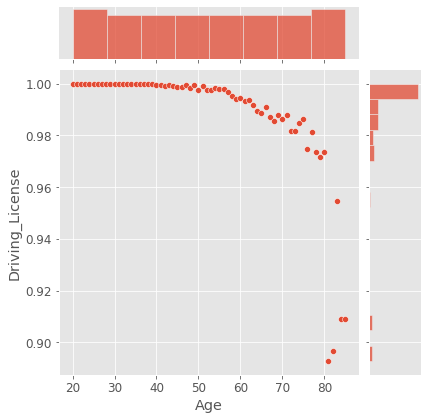

In [ ]:
# Plotting jointplot of Age Vs driving license
plt.figure(figsize=(8,6))
sns.jointplot(x='Age', y='Driving_License', data=((df[df['Driving_License']==1]).groupby('Age')['Driving_License'].sum() / df.groupby('Age')['Driving_License'].count()).reset_index());

> **It can be observed around the age of 50, everybody has a license.**

> **Around the latter ages, people having license significantly reduces.**

<Figure size 576x432 with 0 Axes>

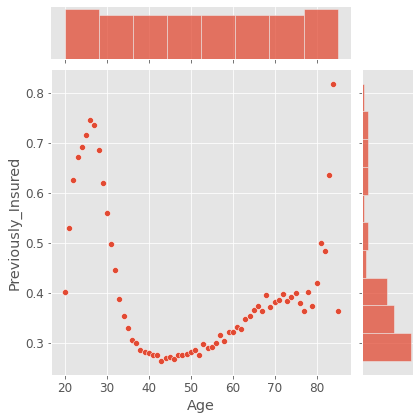

In [ ]:
# Plotting Age vs Previously Insured
plt.figure(figsize=(8,6))
sns.jointplot(x='Age', y='Previously_Insured', data=((df[df['Previously_Insured']==1]).groupby('Age')['Previously_Insured'].sum() / df.groupby('Age')['Previously_Insured'].count()).reset_index());

> **This is an interesting trend. People around the age of 25 have been insured the highest previously.**

> **People between the age groups of 35-55 has been insured the lowest.**

> **A dfpoint around the age of 80 has the highest rate of previous insurance.**

<Figure size 576x432 with 0 Axes>

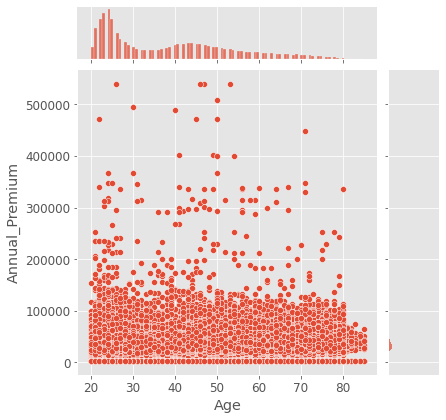

In [ ]:
# Jointplot Age Vs Annual Premium
plt.figure(figsize=(8,6))
sns.jointplot(x='Age', y='Annual_Premium', data=df);

> **People around he age of 30 are charged the maximum, which is strange. Generally, older people are charged higher because of the risk involved.**

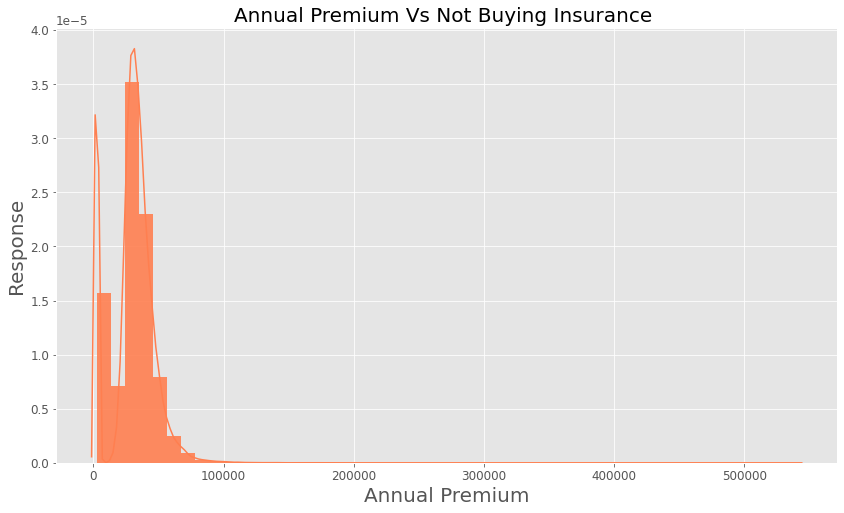

In [ ]:
# Plotting Annual Premium Vs Not Buying Insurance
fig=plt.figure(figsize=(14,8))
sns.distplot(df[df['Response']==0]['Annual_Premium'],color='coral',hist_kws={'alpha':0.9})
plt.xlabel('Annual Premium',fontsize=20)
plt.ylabel('Response',fontsize=20)
plt.title('Annual Premium Vs Not Buying Insurance ',fontsize=20);

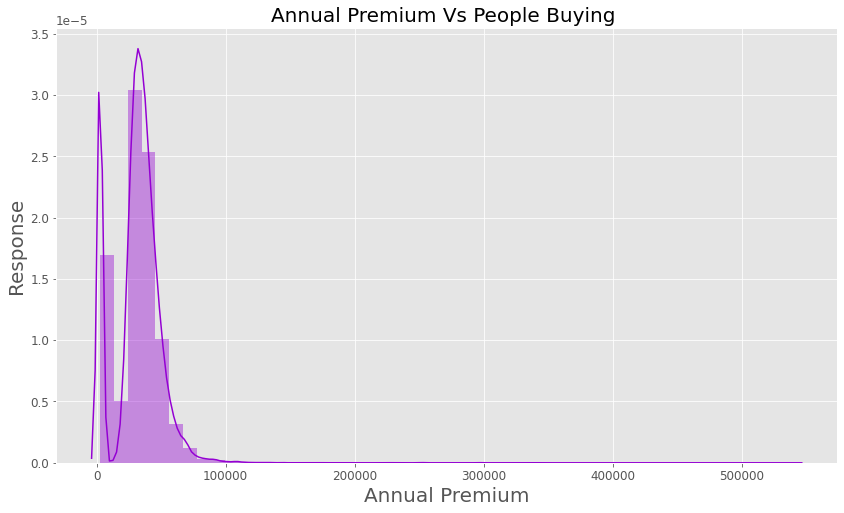

In [ ]:
# Plotting Annual Premium Vs People Buying

fig=plt.figure(figsize=(14,8))
sns.distplot(df[df['Response']==1]['Annual_Premium'],color='darkviolet',hist_kws={'alpha':0.4})
plt.xlabel('Annual Premium',fontsize=20)
plt.ylabel('Response',fontsize=20)
plt.title('Annual Premium Vs People Buying ',fontsize=20);

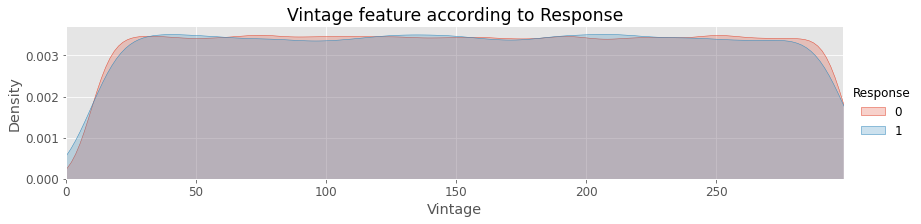

In [ ]:
# Plotting Vintage feature according to Response
facetgrid = sns.FacetGrid(df,hue="Response",aspect = 4)
facetgrid.map(sns.kdeplot,"Vintage",shade = True)
facetgrid.set(xlim = (0,df["Vintage"].max()))
facetgrid.add_legend()
plt.title("Vintage feature according to Response");

> **The target variable Response is not very much affected by Vintage feature. So, it can be dropped.**

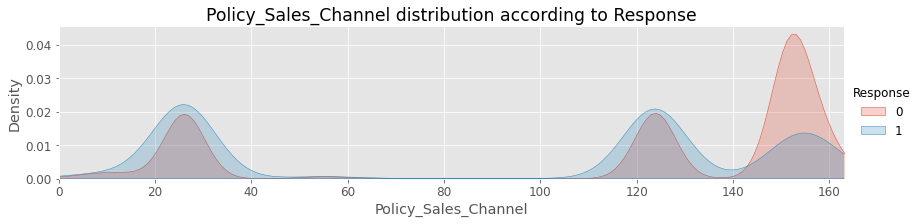

In [ ]:
# plotting Policy_Sales_Channel distribution according to Response

facetgrid = sns.FacetGrid(df,hue="Response",aspect = 4)
facetgrid.map(sns.kdeplot,"Policy_Sales_Channel",shade = True)
facetgrid.set(xlim = (0,df["Policy_Sales_Channel"].max()))
facetgrid.add_legend()
plt.title('Policy_Sales_Channel distribution according to Response');

# **Multivariate analysis**

## **Checking correlation among numerical features**

In [ ]:
# Creating a vif dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df[numerical_cols].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df[numerical_cols].values, i)
                          for i in range(len(df[numerical_cols].columns))]

vif_data

,feature,VIF
0,Age,4.155642
1,Annual_Premium,3.355962
2,Vintage,3.269352


> **VIF is less than 5. SO, its good we do not have correlated features here.**

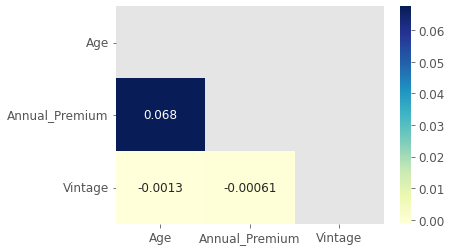

In [ ]:
# PLotting a heatmap
sns.heatmap(df[numerical_cols].corr(), cmap="YlGnBu", annot=True, mask= np.triu(np.ones_like(df[numerical_cols].corr())));

> **No strong correlation exists here.**

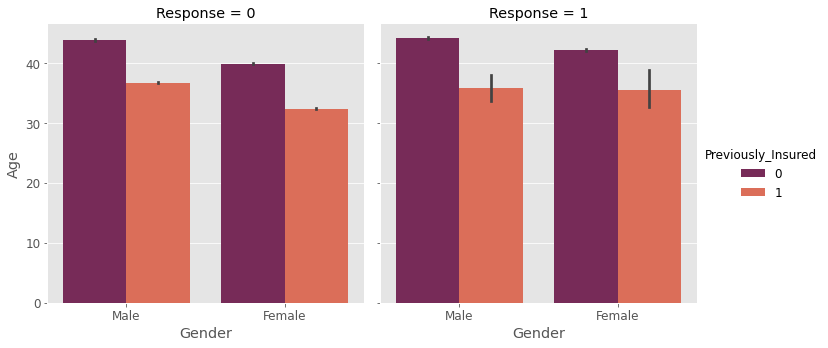

In [ ]:
# Plotting a catplot of Age Vs gender Vs response
sns.catplot(x='Gender',y='Age',hue='Previously_Insured',col='Response',data=df,kind='bar',palette='rocket');

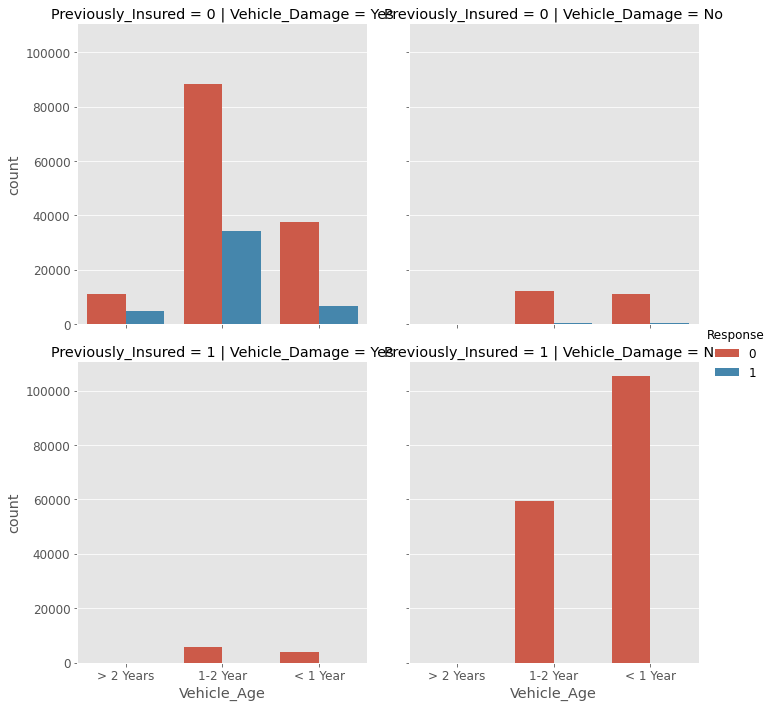

In [ ]:
# Plotting Vehicle age vs response
sns.catplot(data=df, x='Vehicle_Age', hue='Response', col='Vehicle_Damage', row='Previously_Insured', kind='count');

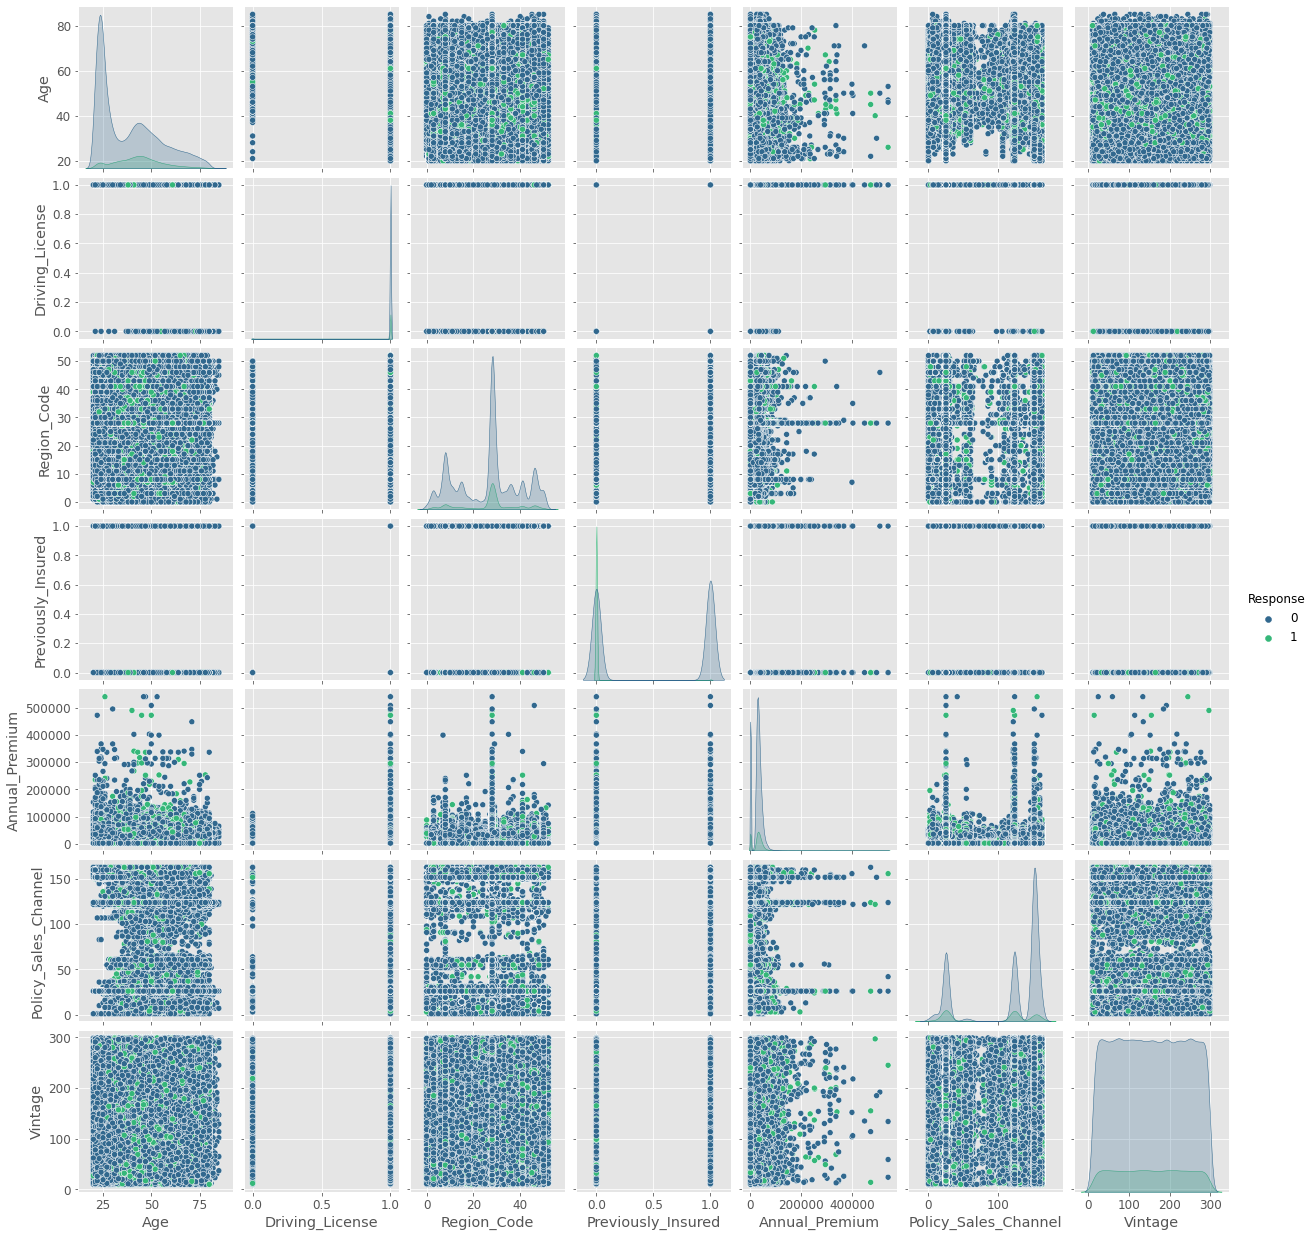

In [ ]:
# PLotting pairplots 
sns.pairplot(df,hue='Response',palette='viridis')

## **Data Preprocessing And Preparation**


In [ ]:
# Creating a shallow copy of DataFrame
df_copy2 = df.copy()

In [ ]:
# Dropping id column, also doing label encoding
df_copy2['Gender'] = np.where(df_copy2['Gender']=='Male',1,0)
df_copy2.drop(columns = ['id'],inplace = True)

df_copy2['> 2 Years'] = np.where(df_copy2['Vehicle_Age']=='> 2 Years',1,0)
df_copy2['1-2 Year'] = np.where(df_copy2['Vehicle_Age']=='1-2 Year',1,0)
df_copy2['< 1 Year'] = np.where(df_copy2['Vehicle_Age']=='< 1 Year',1,0)

df_copy2.drop('Vehicle_Age',axis=1,inplace=True)
df_copy2['Vehicle_Damage'] = df_copy2['Vehicle_Damage'].apply(lambda x:1 if x=='Yes' else 0)

df_copy2['Age'] = np.log(df_copy2['Age'])
df_copy2['Annual_Premium'] = np.log(df_copy2['Annual_Premium'])
df_copy2['Vintage'] = np.log(df_copy2['Vintage'])

In [ ]:
features2 = list()
for i in df_copy2.columns:
  if i=='Response':
    pass
  else:
    features2.append(i)

In [ ]:
# Splitting data to X and y. And then doing train test split.
X1 = df_copy2[features2]
y1 = df_copy2['Response']
X_train, X_test, y_train, y_test = train_test_split( X1,y1 , test_size = 0.2, random_state = 5)

In [ ]:
# Doing target encoding
encoder=ce.TargetEncoder(cols=['Region_Code','Policy_Sales_Channel'])
encoded_values_array = encoder.fit_transform(X_train[['Region_Code','Policy_Sales_Channel']],y_train).values

In [ ]:
# Fitting on train data
X_train['Region_Code'] = encoded_values_array[:,0]
X_train['Policy_Sales_Channel'] = encoded_values_array[:,1]

In [ ]:
# Transforming test data
encoded_values_array_test = encoder.transform(X_test[['Region_Code','Policy_Sales_Channel']],y_test).values
X_test['Region_Code'] = encoded_values_array_test[:,0]
X_test['Policy_Sales_Channel'] = encoded_values_array_test[:,1]

In [ ]:
# Class imabalance exists. So oversampling the class 1 using SMOTE
smote = SMOTE(random_state=8)

X_smote, y_smote = smote.fit_resample(X_train.values, y_train.values)

print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 304887
Resampled dataset shape 534854


In [ ]:
# Scaling the data
scaler2 = MinMaxScaler()
X_smote[:,[1,6,8]] = scaler2.fit_transform(X_smote[:,[1,6,8]])

In [ ]:
# Transforming the test data
X_test[['Age','Annual_Premium','Vintage']] = scaler2.transform(X_test[['Age','Annual_Premium','Vintage']])

In [ ]:
# Saving the dataframes so we can use it for further modelling 
X_train_df = pd.DataFrame(X_smote,columns = features2)
X_test_df = pd.DataFrame(X_test.values,columns=features2)
y_train_series = pd.Series(y_smote,name= 'Response')
y_test_series = pd.Series(y_test.values,name='Response')